In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

import autograd.numpy as np
from autograd import grad, jacobian, hessian, elementwise_grad


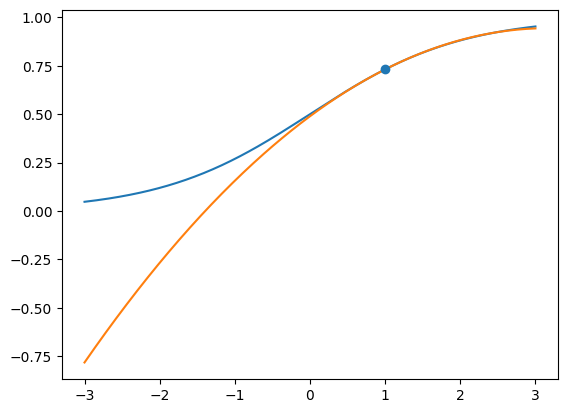

In [56]:
x = np.linspace(-3, 3, 300)

def sigmoid(x):
    #return (2 - x) ** 2 - 0.5 * x + 1
    return 1 / (1 + np.exp(-x))

def tangent(f, x):
    y = f(x)
    slope = grad(f)(x)

    def tf(a):
        return (a - x) * slope + y

    return tf

def tangent2(f, x):
    y = f(x)
    slope = grad(f)(x)
    curve = 0.5 * grad(grad(f))(x)

    def tf(a):
        return curve * (a - x) ** 2 + (a - x) * slope + y
    return tf


dsigmoid = elementwise_grad(sigmoid)
d2sigmoid = elementwise_grad(dsigmoid)

point = 1.
tpoint = tangent2(sigmoid, point)


plt.scatter(point, sigmoid(point), zorder=10)
plt.plot(x, sigmoid(x))
plt.plot(x, tpoint(x))

#plt.plot(x, d2sigmoid(x))